In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances

sns.set_style('whitegrid')


# Load Data

In [2]:
tracks = pd.read_csv('../../data/processed/tracks_processed.csv', dtype=object)
tracks = tracks.set_index(['track_id'])

tracks.head()

,Unnamed: 0,album_date_created,album_date_released,album_favorites,album_id,album_listens,album_tags,album_title,album_tracks,album_type,...,track_genres_all,track_interest,track_language_code,track_listens,track_number,track_title,track_year_created,bit_rate_factor,interest_factor,track_price
track_id,,,,,,,,,,,,,,,,,,,,,
2,0,2008-11-26 1:44,2009-01-05 0:00,4,1,6073,[],AWOL - A Way Of Life,7,Album,...,[21],4656,en,1293,3,Food,2008,0.57,1.0,1.7
3,1,2008-11-26 1:44,2009-01-05 0:00,4,1,6073,[],AWOL - A Way Of Life,7,Album,...,[21],1470,en,514,4,Electric Ave,2008,0.57,1.0,1.7
5,2,2008-11-26 1:44,2009-01-05 0:00,4,1,6073,[],AWOL - A Way Of Life,7,Album,...,[21],1933,en,1151,6,This World,2008,0.57,1.0,1.7
10,3,2008-11-26 1:45,2008-02-06 0:00,4,6,47632,[],Constant Hitmaker,2,Album,...,[10],54881,en,50135,1,Freeway,2008,0.43,1.0,1.29
20,4,2008-11-26 1:45,2009-01-06 0:00,2,4,2710,[],Niris,13,Album,...,"[17, 10, 76, 103]",978,en,361,3,Spiritual Level,2008,0.57,1.0,1.7


In [3]:
#tracks = tracks.dropna()

X_columns=["track_listens","bit_rate_factor","interest_factor"]
tracks = tracks[X_columns]

# normalize the columns

track_norm = tracks.copy()
track_norm
for col in X_columns:
    track_norm[col] = StandardScaler().fit_transform(track_norm[col].values.reshape(-1, 1))

#print(tracks.shape)
track_norm

/home/cloudera/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,track_listens,bit_rate_factor,interest_factor
track_id,,,
2,-0.129946,-0.109260,0.679834
3,-0.226709,-0.109260,0.679834
5,-0.147584,-0.109260,0.679834
10,5.936925,-1.060038,0.679834
20,-0.245713,-0.109260,0.679834
26,-0.266581,-0.109260,0.679834
30,-0.214536,-0.109260,-0.649095
46,-0.269314,-0.109260,-1.645792
48,-0.269066,-0.109260,-1.645792


# Model Training

In [43]:
k = 7
kmeans = KMeans(n_clusters=k).fit(track_norm.values)

print(set(kmeans.labels_))
print(collections.Counter(kmeans.labels_))

tracks_results = tracks.copy()
track_norm['cluster'] = kmeans.labels_
tracks_results['cluster'] = kmeans.labels_


{0, 1, 2, 3, 4, 5, 6}
Counter({0: 47092, 2: 26541, 1: 20128, 4: 9924, 5: 2032, 3: 165, 6: 17})


# Analyze the results

[('2', 1), ('3', 1), ('5', 1), ('20', 1), ('26', 1)]
[('140', 1), ('141', 1), ('142', 1), ('226', 1), ('228', 1)]
[('30', 1), ('46', 1), ('48', 1), ('153', 1), ('154', 1)]
[('1482', 1), ('10778', 1), ('12672', 1), ('18197', 1), ('21293', 1)]
[('139', 1), ('151', 1), ('152', 1), ('155', 1), ('156', 1)]
[('10', 1), ('1067', 1), ('3772', 1), ('4280', 1), ('4483', 1)]
[('24425', 1), ('35033', 1), ('42377', 1), ('54159', 1), ('62460', 1)]
track_listens


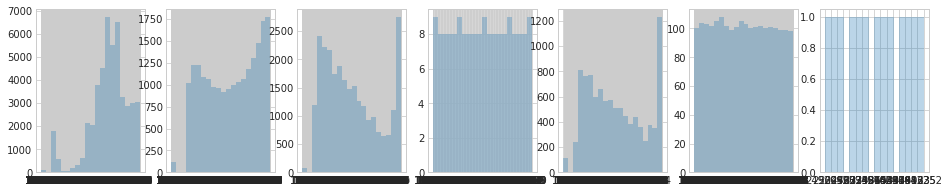

bit_rate_factor


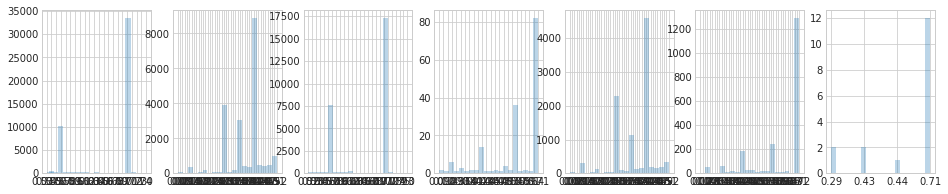

interest_factor


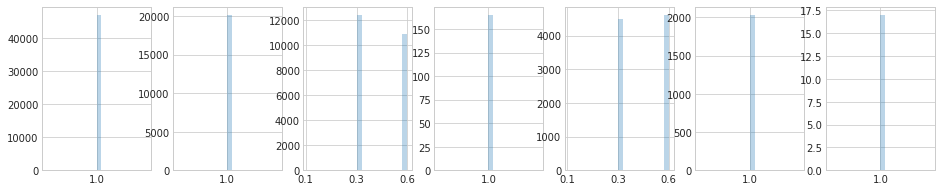

In [46]:

tracks_results = tracks_results.reset_index()
for cluster in sorted(set(kmeans.labels_)):
    print(collections.Counter(tracks_results[tracks_results['cluster']==cluster]['track_id']).most_common(5))

n_clusters = len(set(kmeans.labels_))
for col in X_columns:
    print(col)
    i = 1
    plt.figure(figsize=(16,3))
    for cluster in sorted(set(kmeans.labels_)):
        plt.subplot(1, n_clusters, i)
#        plt.xlim([0,tracks_results[col].max()])
        plt.hist(tracks_results[tracks_results['cluster']==cluster][col], label=str(cluster), alpha=0.3, bins=20)
        i += 1
    plt.show()
